# Global Al Hub - Aygaz Machine Learning Bootcamp Final Project

##### Medical Cost Personal Dataset Multivariate Regression Analysis

This project aims to analyse and predict medical expenses based on age, sex, bmi, children, smoker and region datas.

##### Dataset
https://www.kaggle.com/datasets/mirichoi0218/insurance

# Importing Required Libraries

In [368]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Label Encoder and train_test_split, gridsearchcv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# for min_max scaling
from sklearn.preprocessing import MinMaxScaler

# Import models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [250]:
sns.set_theme()

In [251]:
# Load data
data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df = data.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [252]:
df.shape

(1338, 7)

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [254]:
# Convert object columns to categorical to get advantage for memory usage, performance and better semantics.
df[["sex", "smoker", "region"]]=df[["sex", "smoker", "region"]].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [255]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Exploratory Data Analysis

In [256]:
# Checking unique values
df["age"].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [257]:
df["sex"].unique()

['female', 'male']
Categories (2, object): ['female', 'male']

In [258]:
df["children"].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [259]:
df["smoker"].unique()

['yes', 'no']
Categories (2, object): ['no', 'yes']

In [260]:
df["region"].unique()

['southwest', 'southeast', 'northwest', 'northeast']
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']

### Examine the distribution of Bmi (Body Mass Index)

<Axes: xlabel='bmi', ylabel='Count'>

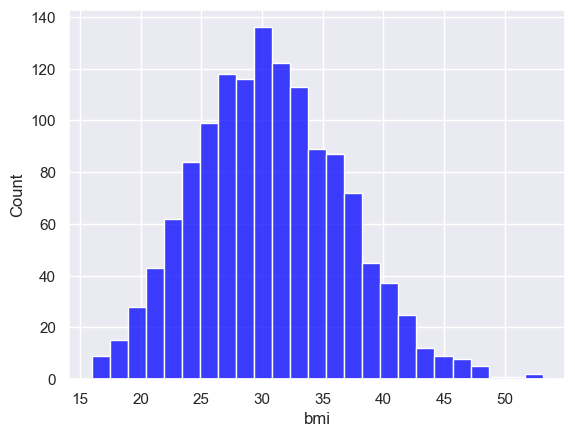

In [261]:
sns.histplot(data=df["bmi"], kde=False, color="blue" )

Most of people have 30 BMI which is in the obese category.

### Is there an outlier in the "bmi" variable? Please review.


| Category    | BMI (kg/m2) |
| -------- | ------- |
| Underweight  | < 18.5 |
| Normal weight | 18.5 – 24.9     |
| Overweight    | 25.0 – 29.9    |
| Obese (Class I)    | 30.0 – 34.9   |
| Obese (Class II)    | 35.0 – 39.9   |
| Obese (Class III)    | 40.0-49.9    |
| Obese (Class IV)    | >50.0 |

According to the World Health Organization (WHO) BMI chart, there are no outliers.

### Examine the relationship between “smoker” and “charges”

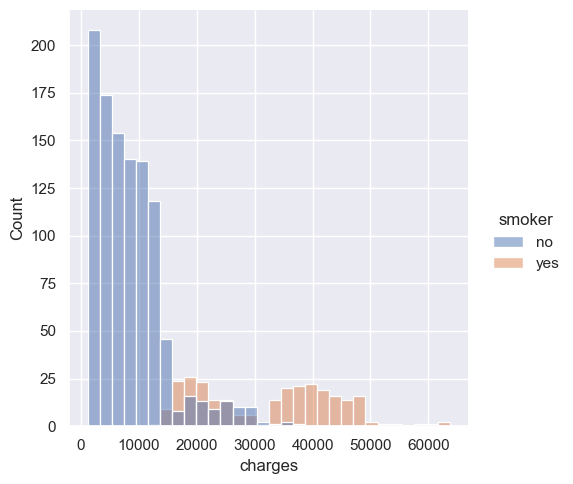

In [262]:
sns.displot(data=df, x=df["charges"], hue="smoker")

As we see in the chart, non smoker people are charging less than smoker ones.

### Examine the relationship between “smoker” and “region”.

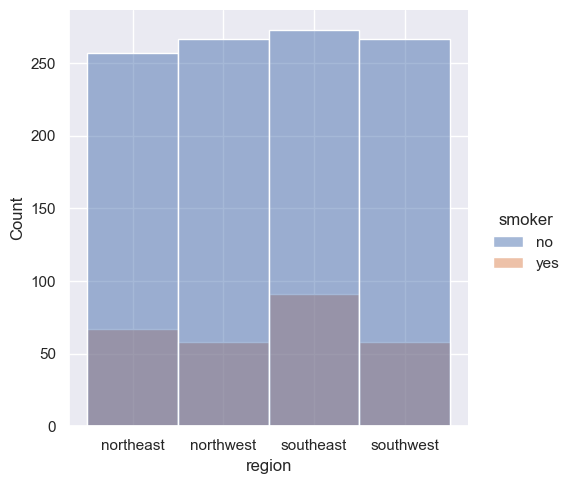

In [263]:
sns.displot(data=df, x=df["region"], hue="smoker")

There is no evident difference with distrubiton among non smoker people but most of smoker people are in southeast.

### Examine the relationship between “bmi” and “sex”

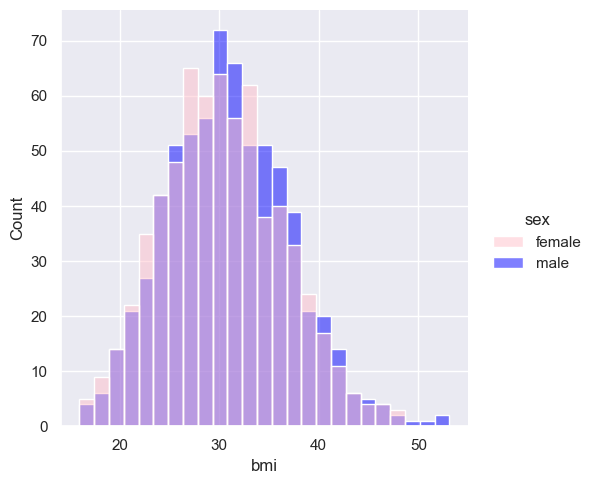

In [264]:
sns.displot(data=df, x=df["bmi"], hue="sex", palette={'female': 'pink', 'male': 'blue'})

For obese category which is 30+ BMI, males are more than females.

### Find the "region" with the most "children".

In [265]:
df[["region", "children"]].groupby(["region"]).count()

,children
region,
northeast,324
northwest,325
southeast,364
southwest,325


Most children are in the southeast region.

### Examine the relationship between “age” and “bmi”.

In [266]:
grouped_bmi=pd.cut(x=df["bmi"], bins=[0,18,25,30,60], labels=["Underweight (0-18)","Healthy Weight (18-25)", 
                                                               "Overweight (25-30)","Obesity (30+)"])

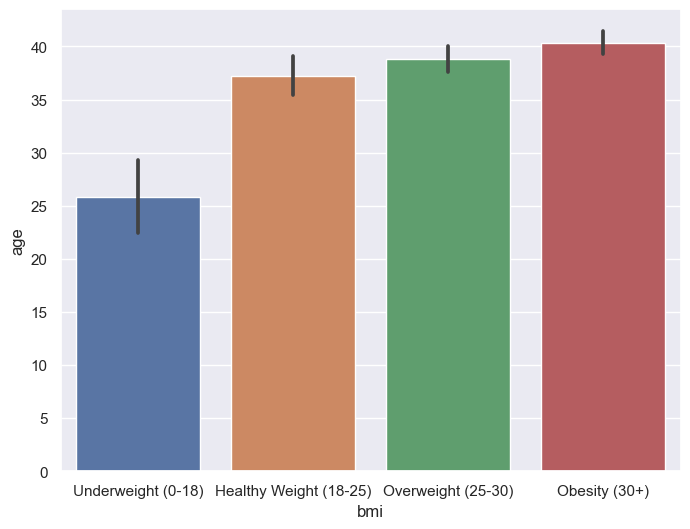

In [267]:
plt.figure(figsize=(8, 6))
ax=sns.barplot(data=df, x=grouped_bmi, y="age")

There is a positive correlation between weight gaining and aging.

### Examine the relationship between “bmi” and “children”.

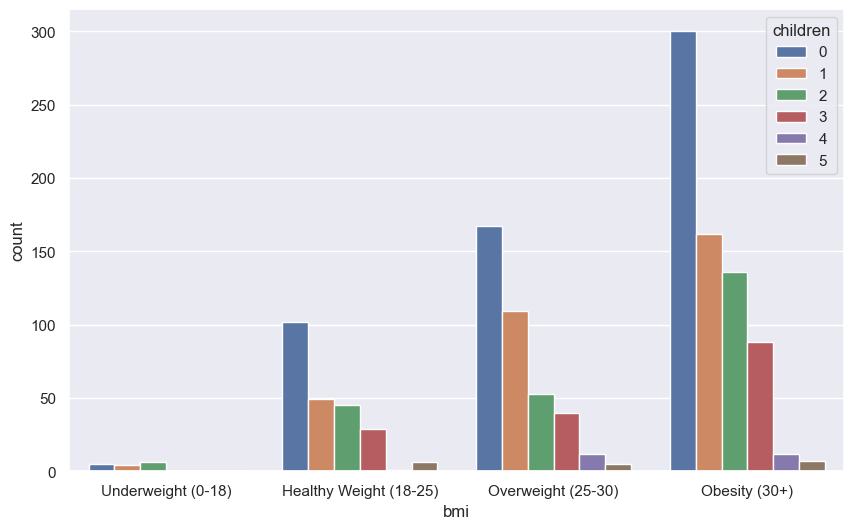

In [268]:
plt.figure(figsize=(10, 6))
ax=sns.countplot(data=df, x=grouped_bmi, hue="children")

Underweight and most obese category people do not have children, most people with 1,2 and 3 children are in obese category 

### Examine the relationship between “bmi” and “charges”

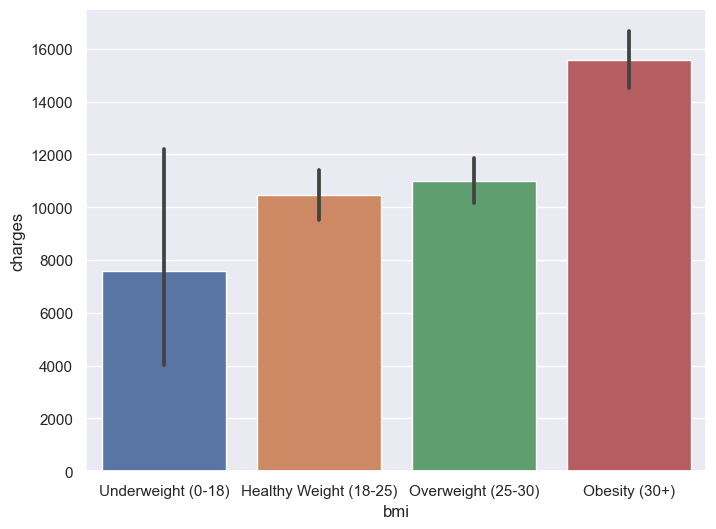

In [269]:
plt.figure(figsize=(8, 6))
ax=sns.barplot(data=df, x=grouped_bmi, y="charges")

People in obese category are charging more than other categories

### Examine the relationship between “region”, “smoker” and “bmi” using bar plot

In [283]:
region_mapping = {'northeast': 1, 'northwest': 2, 'southeast': 3, 'southwest': 4}
copy_df=df.copy()
mapped= df['region'].map(region_mapping)
copy_df["region"]=mapped
copy_df["region"]=copy_df["region"].astype("int64")

[Text(0, 1, 'northeast'),
 Text(0, 2, 'northwest'),
 Text(0, 3, 'southeast'),
 Text(0, 4, 'southwest')]

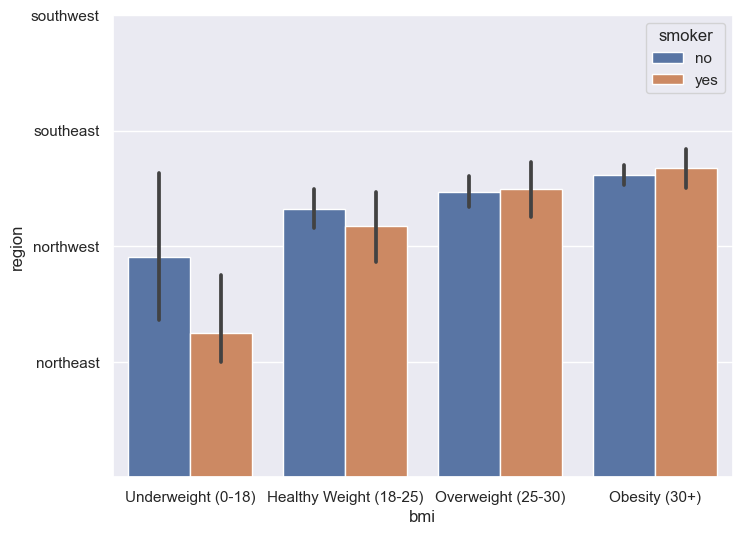

In [307]:
plt.figure(figsize=(8, 6))
ax=sns.barplot(data=copy_df, x=grouped_bmi, y="region", hue="smoker")
ax.set_yticks(range(1,5))
ax.set_yticklabels(region_mapping)

Most people are in the northwest region.

### Relationship between “age”, “smoker” and “sex”

In [140]:
grouped_age=pd.cut(x=df["age"], bins=[0,30,40,50,100], labels=["Young (0-30)","Adult (30-40)", 
                                                               "Middle Aged (40-50)","Old (50+)"])

In [141]:
df[["age", "sex"]].pivot_table(values="age", index=grouped_age, columns=["sex"], aggfunc="count")

sex,female,male
age,,
Young (0-30),214,230
Adult (30-40),127,130
Middle Aged (40-50),140,141
Old (50+),181,175


In [142]:
df[["age", "smoker", "sex"]].pivot_table(values=df[["age"]], 
                                         index=[grouped_age, "sex"], columns=["smoker"], aggfunc="count")

age    
smoker                       no yes
age                 sex            
Young (0-30)        female  174  40
                    male    175  55
Adult (30-40)       female  105  22
                    male     98  32
Middle Aged (40-50) female  114  26
                    male    106  35
Old (50+)           female  154  27
                    male    138  37

Non smokers are more than smokers, young people are smoking more than older ones.

### Relationship between “age”, “bmi” and “sex”

In [146]:
df[["age", "bmi", "sex"]].pivot_table(values="age", index=[grouped_bmi, grouped_age], columns=["sex"], aggfunc="count")

sex                                         female  male
bmi                    age                              
Underweight (0-18)     Young (0-30)              6     5
                       Adult (30-40)             2     2
                       Middle Aged (40-50)       0     0
                       Old (50+)                 0     0
Healthy Weight (18-25) Young (0-30)             49    44
                       Adult (30-40)            26    18
                       Middle Aged (40-50)      19    23
                       Old (50+)                29    24
Overweight (25-30)     Young (0-30)             58    65
                       Adult (30-40)            44    44
                       Middle Aged (40-50)      49    42
                       Old (50+)                46    38
Obesity (30+)          Young (0-30)            101   116
                       Adult (30-40)            55    66
                       Middle Aged (40-50)      72    76
                       Old (50+)               106   113

Most people are in obese category 

### Label Encoding

In [316]:
clean_df=df.copy()

categorical_colums=df[["sex", "smoker", "region"]]
le = LabelEncoder()

for i in categorical_colums.columns:
    clean_df[i]=le.fit_transform(clean_df[i])

### Split dataset

In [321]:
X = clean_df.drop(['charges'], axis = 1)
y = df['charges']

In [322]:
# Split the dataset into train and test sets with 80-20 ratio
X_train, X_test,y_train, y_test =train_test_split(X,y, test_size=0.2)

### Scale the dataset by normalizing

In [333]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data using the scaler to make the data between 0 and 1
scaled_training_df = scaler.fit_transform(X_train)

# Transform the test data, we use 'transform' method for scaling paramaters learned on the train data.
scaled_test_df=scaler.transform(X_test)

### Model Selection

In [352]:
# Linear Regression
linear = LinearRegression()
linear_model = linear.fit(X_train,y_train)
linear_pred = linear_model.predict(X_test)

# Ridge Regression
ridge = Ridge()
ridge_model = ridge.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

# Lasso Regression
lasso = Lasso()
lasso_model= lasso.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

# ElasticNet Regression
elastic = ElasticNet()
elastic_model = elastic.fit(X_train, y_train)
elastic_pred = elastic_model.predict(X_test)

# Decision Tree Regression
tree = DecisionTreeRegressor(max_depth=3, random_state=22)
tree_model = tree.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

# Random Forest Regression
random_forest = RandomForestRegressor(random_state=22)
forest_model = random_forest.fit(X_train,y_train)
random_forest_pred = forest_model.predict(X_test)

In [350]:
# RMSE for Linear Model
linear_rmse=math.sqrt(mean_squared_error(y_test, linear_pred))

# RMSE for Ridge model
ridge_rmse=math.sqrt(mean_squared_error(y_test, ridge_pred)) 

# RMSE for Lasso model
lasso_rmse=math.sqrt(mean_squared_error(y_test, lasso_pred)) 

# RMSE for ElasticNet model
elastic_rmse=math.sqrt(mean_squared_error(y_test, elastic_pred)) 

# RMSE for Decision Tree model
tree_rmse=math.sqrt(mean_squared_error(y_test, tree_pred))

# RMSE for Random forest model
random_forest_rmse=math.sqrt(mean_squared_error(y_test, random_forest_pred))

In [351]:
print("***** Linear Regression RMSE *****")
print(linear_rmse)

print("***** Ridge Regression RMSE *****")
print(ridge_rmse)

print("***** Lasso Regression RMSE *****")
print(ridge_rmse)

print("***** ElasticNet RMSE *****")
print(elastic_rmse)

print("***** Decision Tree RMSE *****")
print(tree_rmse)

print("***** Random forest RMSE *****")
print(random_forest_rmse)

***** Linear Regression RMSE *****
5998.969201254684
***** Ridge Regression RMSE *****
5999.644542449199
***** Lasso Regression RMSE *****
5999.644542449199
***** ElasticNet RMSE *****
9710.668089438877
***** Decision Tree RMSE *****
4632.240962730453
***** Random forest RMSE *****
4827.156397657636


A lower RMSE indicates that the model's predictions are closer to the actual values, Decision tree regressor is the best one.

### Hyper-parameter Optimization

In [366]:
# Grid Search CV
decision_param_grid = [
   { "min_samples_split": [2, 3, 4], "max_depth": [3, 4, 5, 7, 9] }, 
]

tree_reg = DecisionTreeRegressor(random_state=13)

tree_grid_search = GridSearchCV(tree_reg, decision_param_grid, cv=5, scoring='neg_mean_squared_error', refit=True)
tree_grid_search.fit(X, y)
print("Best Parameters:", tree_grid_search.best_params_)

Best Parameters: {'max_depth': 4, 'min_samples_split': 2}


In [367]:
selected_model = DecisionTreeRegressor(random_state=13, max_depth=4, min_samples_split = 2)
final_model = selected_model.fit(X_train,y_train)
final_model_pred = final_model.predict(X_test)
print(math.sqrt(mean_squared_error(y_test, final_model_pred)))

4545.467542039057


### Model Evaluation

In [370]:
print("Final model Root Mean Squared Error", math.sqrt(mean_squared_error(y_test, final_model_pred)))
print("Final model Mean Absolute Error", mean_absolute_error(y_test, final_model_pred))

Final model Root Mean Squared Error 4545.467542039057
Final model Mean Absolute Error 2674.7204774735446
